## Homework

In [3]:
data = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

In [4]:
!wget $data

--2024-11-04 23:01:17--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 23:01:17--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.08s   

2024-11-04 23:01:18 (4.58 MB/s) - ‘

### Preparing the dataset

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(data)
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
df = df.drop("student_id", axis=1)

In [17]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [19]:
df = df.fillna(0)

In [20]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [22]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [23]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [24]:
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test["jamb_score"]

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [69]:
train_dicts = df_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

### Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

In [70]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [71]:
from sklearn.tree import export_text

In [72]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 21.50
|   |--- value: [159.46]
|--- study_hours_per_week >  21.50
|   |--- value: [193.55]



### Question 2
Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1) 
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [75]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [76]:
y_pred = rf.predict(X_val)

In [77]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_val, y_pred))

np.float64(41.74858062257926)

### Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [78]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1) #estimators: # of models
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n,rmse))

In [79]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "rmse"])
df_scores

,n_estimators,rmse
0,10,41.748581
1,20,40.942490
2,30,40.691143
3,40,40.699828
4,50,40.544891
5,60,40.390894
6,70,40.261221
7,80,40.240430
8,90,40.211157
9,100,40.168571


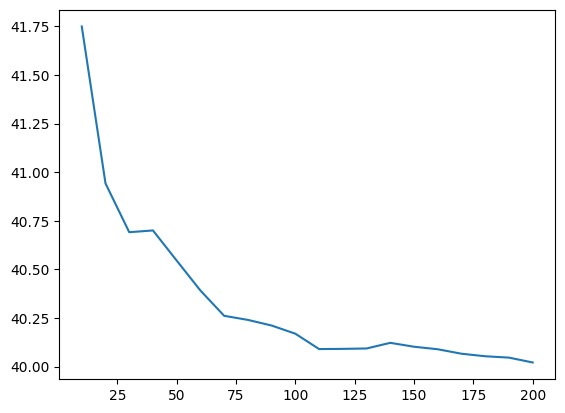

In [80]:
import matplotlib.pyplot as plt
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))
plt.show()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [81]:
scores = []

for d in [10, 15, 20, 25]: #depth
    for n in range(10, 201, 10): #trees
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1, 
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, rmse))

In [82]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,40.895163
1,10,20,40.481823
2,10,30,40.325220
3,10,40,40.347784
4,10,50,40.243970


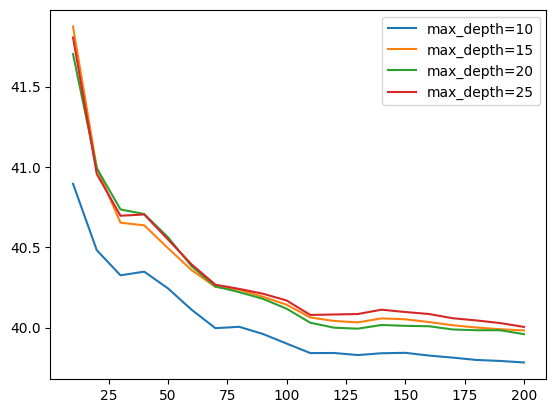

In [83]:
for d in [10, 15, 20, 25]: #depth
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label="max_depth=%d" % d)
plt.legend()

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [84]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [86]:
rf.feature_importances_
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rf.feature_importances_
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
27,study_hours_per_week,0.256048
4,attendance_rate,0.149273
5,distance_to_school,0.143265
28,teacher_quality,0.082330
2,age,0.060842


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [88]:
import xgboost as xgb

features = dv.feature_names_

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [89]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [90]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [91]:

%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [92]:
scores['eta=0.3'] = parse_xgb_output(output)

In [93]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [94]:
scores['eta=0.1'] = parse_xgb_output(output)

In [95]:
scores

{'eta=0.3':     num_iter  train_rmse  val_rmse
 0          0    43.10072  44.73047
 1          1    40.35560  42.86015
 2          2    38.43427  41.64819
 3          3    37.10323  41.03595
 4          4    36.03853  40.57367
 ..       ...         ...       ...
 95        95    14.44294  42.36698
 96        96    14.32488  42.35110
 97        97    14.18397  42.37106
 98        98    14.17983  42.37152
 99        99    14.10864  42.38450
 
 [100 rows x 3 columns],
 'eta=0.1':     num_iter  train_rmse  val_rmse
 0          0    45.86331  46.90704
 1          1    44.51265  45.78884
 2          2    43.35705  44.90659
 3          3    42.33575  44.13929
 4          4    41.40712  43.40305
 ..       ...         ...       ...
 95        95    26.57538  39.34904
 96        96    26.45841  39.35932
 97        97    26.42418  39.36311
 98        98    26.31467  39.38019
 99        99    26.23431  39.38929
 
 [100 rows x 3 columns]}

In [96]:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_a,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'val_auc'